# Personality based categorization - Clustering

the dataset is taken from kaggle

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
personality = pd.read_csv('data.csv',sep="\t")
personality.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826


In [8]:
personality.drop(['age','gender','accuracy','country','source','elapsed'],axis=1,inplace=True)
personality.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1,4,2,3,3,2,3,4,4,3,...,5,5,5,4,4,5,1,2,5,2
1,4,3,4,3,4,4,4,4,2,2,...,4,4,4,2,3,2,3,2,2,2
2,3,4,4,4,4,4,4,3,2,2,...,3,3,4,2,4,2,2,3,3,3
3,4,5,4,4,4,3,3,2,2,2,...,4,2,2,2,3,4,2,3,4,4
4,4,0,4,4,4,3,5,1,2,4,...,4,3,4,3,4,3,4,2,3,2


In [9]:
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 163 entries, A1 to P10
dtypes: int64(163)
memory usage: 61.1 MB


In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=16)

In [11]:
km.fit(personality)

KMeans(n_clusters=16)

In [12]:
km.cluster_centers_

array([[3.55906149, 3.79288026, 3.30946602, ..., 2.53843042, 2.96480583,
        2.9526699 ],
       [4.29720464, 4.49815401, 4.30063291, ..., 3.55195148, 4.12684599,
        4.02373418],
       [2.60977502, 2.81846393, 3.41621412, ..., 2.12723041, 3.03374709,
        2.84406517],
       ...,
       [3.17384693, 3.3768373 , 3.35757729, ..., 2.60466295, 3.32970096,
        3.00861632],
       [4.35078534, 4.45055265, 4.02036067, ..., 3.89557882, 4.17452007,
        4.04886562],
       [3.57828418, 3.69008043, 4.08391421, ..., 3.0463807 , 3.9230563 ,
        3.71260054]])

In [13]:
personality['Personality']=km.labels_
personality.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P2,P3,P4,P5,P6,P7,P8,P9,P10,Personality
0,1,4,2,3,3,2,3,4,4,3,...,5,5,4,4,5,1,2,5,2,12
1,4,3,4,3,4,4,4,4,2,2,...,4,4,2,3,2,3,2,2,2,12
2,3,4,4,4,4,4,4,3,2,2,...,3,4,2,4,2,2,3,3,3,3
3,4,5,4,4,4,3,3,2,2,2,...,2,2,2,3,4,2,3,4,4,3
4,4,0,4,4,4,3,5,1,2,4,...,3,4,3,4,3,4,2,3,2,9


<AxesSubplot:xlabel='Personality', ylabel='count'>

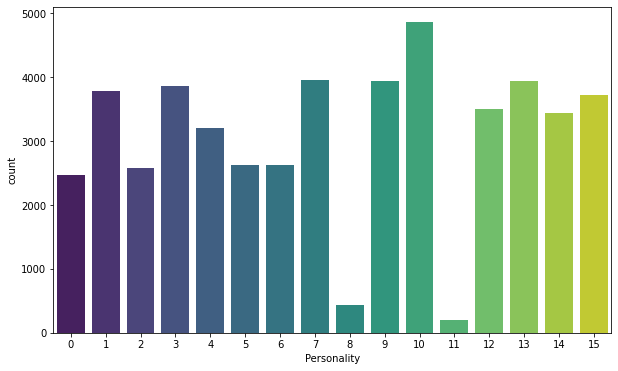

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(personality['Personality'], palette='viridis')